# **Masfudin Dwi Cahyo**

### **masfudindc@gmail.com**



---



# **Submission Dicoding**

## **Proyek Akhir : Klasifikasi Gambar**


---



# **Import Library**

In [20]:
# Install library tensorflow
!pip install tensorflow

In [38]:
# Import library yang diperlukan
import os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

# **Load Data**

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Load data bertipe zip dengan library zipfile
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dicoding/rockpaperscissors.zip', 'r') as zip:
  zip.extractall('/content/drive/MyDrive/Dicoding/rockpaperscissors')

In [29]:
# Menentukan path dataset
base_dir = '/content/drive/MyDrive/Dicoding/rockpaperscissors/'

In [30]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [31]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [32]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [33]:
if not os.path.exists(train_roc):
    os.mkdir(train_roc)
if not os.path.exists(train_pap):
    os.mkdir(train_pap)
if not os.path.exists(train_sci):
    os.mkdir(train_sci)
if not os.path.exists(val_roc):
    os.mkdir(val_roc)
if not os.path.exists(val_pap):
    os.mkdir(val_pap)
if not os.path.exists(val_sci):
    os.mkdir(val_sci)

# **Preprocessing dan Split Data**

In [36]:
# # Melakukan split data menjadi train dan validation dengan skala 60:40
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

**Melakukan penyalinan file**

In [39]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [40]:
# Menginisialisasi ImageDataGenerator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [42]:
# Persiapan data train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

# Persiapan data validation
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **Membuat Model**

In [43]:
# Menginisialisasi model sequential (CNN)
model = Sequential()

# Menambahkan layer-layer ke dalam model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [44]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Latih Model**

In [45]:
# Membuat callback untuk mengatur akurasi maksimal
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >98%!")
      self.model.stop_training = True
callbacks = myCallback()


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/10
41/41 - 97s - loss: 0.9183 - accuracy: 0.5709 - val_loss: 0.5817 - val_accuracy: 0.7731 - 97s/epoch - 2s/step
Epoch 2/10
41/41 - 97s - loss: 0.4033 - accuracy: 0.8529 - val_loss: 0.3062 - val_accuracy: 0.8935 - 97s/epoch - 2s/step
Epoch 3/10
41/41 - 96s - loss: 0.2443 - accuracy: 0.9207 - val_loss: 0.2587 - val_accuracy: 0.8993 - 96s/epoch - 2s/step
Epoch 4/10
41/41 - 100s - loss: 0.1939 - accuracy: 0.9352 - val_loss: 0.1766 - val_accuracy: 0.9387 - 100s/epoch - 2s/step
Epoch 5/10
41/41 - 99s - loss: 0.1473 - accuracy: 0.9566 - val_loss: 0.2331 - val_accuracy: 0.9097 - 99s/epoch - 2s/step
Epoch 6/10
41/41 - 99s - loss: 0.1102 - accuracy: 0.9657 - val_loss: 0.1980 - val_accuracy: 0.9236 - 99s/epoch - 2s/step
Epoch 7/10
41/41 - 99s - loss: 0.1021 - accuracy: 0.9649 - val_loss: 0.1459 - val_accuracy: 0.9549 - 99s/epoch - 2s/step
Epoch 8/10
41/41 - 100s - loss: 0.0884 - accuracy: 0.9741 - val_loss: 0.1050 - val_accuracy: 0.9606 - 100s/epoch - 2s/step
Epoch 9/10
41/41 - 98s - los

# **Menyimpan model**

In [47]:
# Setelah melatih model
model.save('/content/drive/MyDrive/Dicoding/rockpaperscissors/model-rps.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Evaluasi Model**

In [48]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

41/41 [==============================] - 30s 722ms/step - loss: 0.0434 - accuracy: 0.9886
Loss: 0.0434
Accuracy: 0.9886


In [50]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

28/28 [==============================] - 20s 714ms/step - loss: 0.1029 - accuracy: 0.9646
Loss: 0.1029
Accuracy: 0.9646


# **Visualisasi Model**

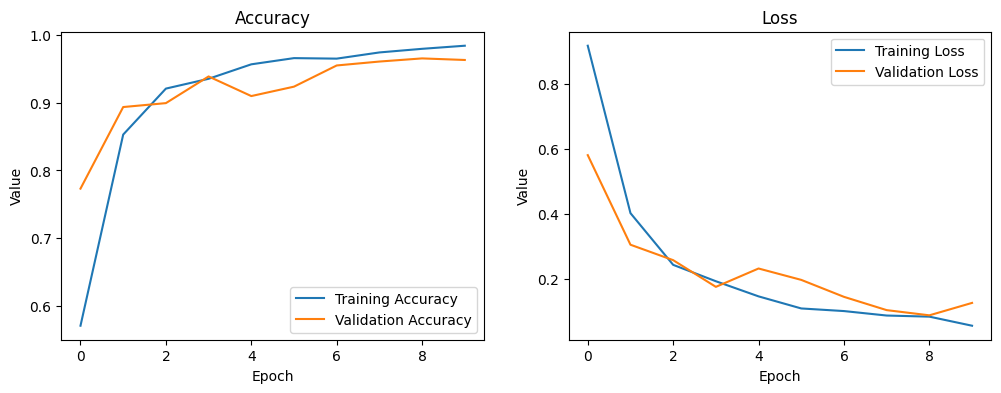

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.title('Loss')

plt.show()

# **Uji Model: Memprediksi Gambar yang Diunggah**

Saving p-test.jpeg to p-test (1).jpeg
1/1 [==============================] - 0s 107ms/step


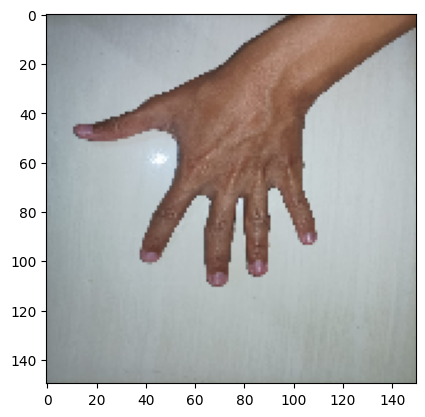

p-test (1).jpeg
paper


In [55]:
# Melakukan prediksi terhadap gambar yang di-upload

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    plt.show()

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    else:
        print('scissors')


Saving 2E8j595xseKRF60J.png to 2E8j595xseKRF60J.png
1/1 [==============================] - 0s 47ms/step


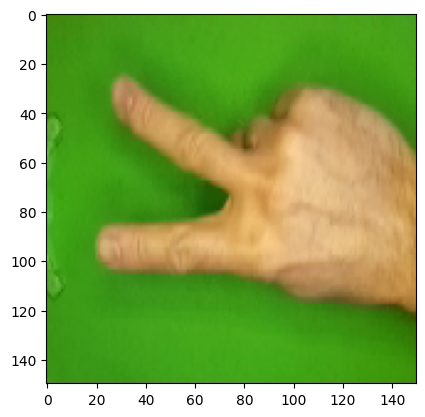

2E8j595xseKRF60J.png
scissors


In [59]:
# Melakukan prediksi terhadap gambar yang di-upload

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    plt.show()

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    else:
        print('scissors')


Saving 2UaJz6Z3xJv3WX9h.png to 2UaJz6Z3xJv3WX9h.png
1/1 [==============================] - 0s 38ms/step


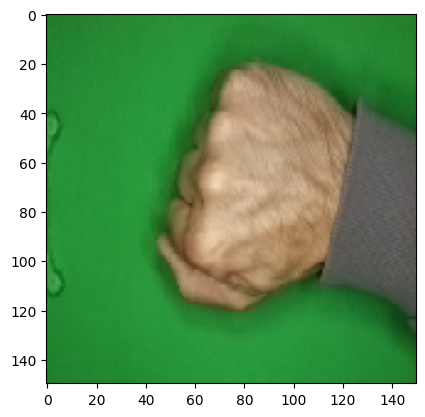

2UaJz6Z3xJv3WX9h.png
rock


In [58]:
# Melakukan prediksi terhadap gambar yang di-upload

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    plt.show()

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    else:
        print('scissors')


# **Keterangan:**

Dalam melakukan train model, jenis runtime yang digunakan adalah Runtime CPU. Jadi, jumlah epochs dalam melatih model hanya 10 kali.